In [130]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram

In [131]:
# Developing Grovers Algorithm

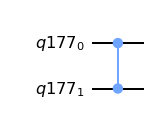

In [132]:
qr = qiskit.QuantumRegister(2)
cr = qiskit.ClassicalRegister(2)
oracle = qiskit.QuantumCircuit(qr, name='oracle')
oracle.cz(0,1)      #Flips the sign for the winning qubit (ie. |11> qubit)
oracle.to_gate()    #Make the oracle into its own gate
oracle.draw(output='mpl')

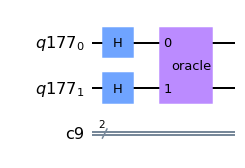

In [133]:
grover_circ = qiskit.QuantumCircuit(qr,cr)
grover_circ.h([qr[0],qr[1]])
grover_circ.append(oracle, [qr[0], qr[1]])

grover_circ.draw(output='mpl')

In [134]:
result = qiskit.execute(grover_circ, backend=qiskit.Aer.get_backend('statevector_simulator'), shots=1024).result()
print(result.get_statevector())
# plot_histogram(result.get_counts(grover_circ))

Statevector([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


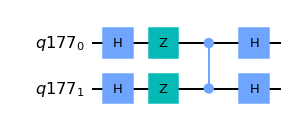

In [135]:
#Reflection operator
reflection = qiskit.QuantumCircuit(qr, name='reflection')
reflection.h([qr[0], qr[1]])
reflection.z([qr[0], qr[1]])
reflection.cz(qr[0], qr[1])
reflection.h([qr[0], qr[1]])
reflection.to_gate()
reflection.draw(output='mpl')

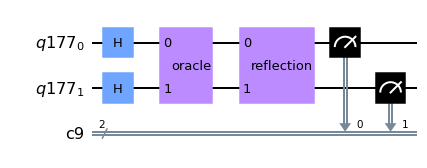

In [136]:
#Prepare the complete circuit
grover_circ = qiskit.QuantumCircuit(qr,cr)
grover_circ.h(qr)
grover_circ.append(oracle, qr)
grover_circ.append(reflection, qr)
grover_circ.measure(qr,cr)

grover_circ.draw(output='mpl')

{'11': 1}


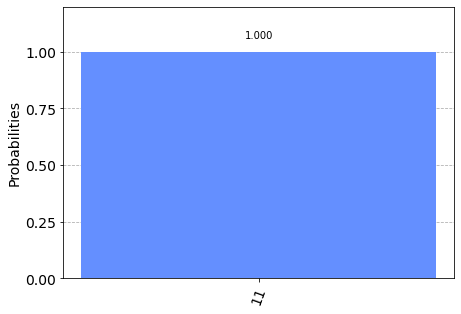

In [137]:
result = qiskit.execute(grover_circ, backend=qiskit.Aer.get_backend('statevector_simulator'), shots=1).result()
print(result.get_counts())
plot_histogram(result.get_counts(grover_circ))